In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import pydataset

In [2]:
pydataset.data('AirPassengers', show_doc=True)

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

In [3]:
df = pydataset.data('AirPassengers')

In [5]:
df.head(12)

,time,AirPassengers
1,1949.000000,112
2,1949.083333,118
3,1949.166667,132
4,1949.250000,129
5,1949.333333,121
6,1949.416667,135
7,1949.500000,148
8,1949.583333,148
9,1949.666667,136
10,1949.750000,119


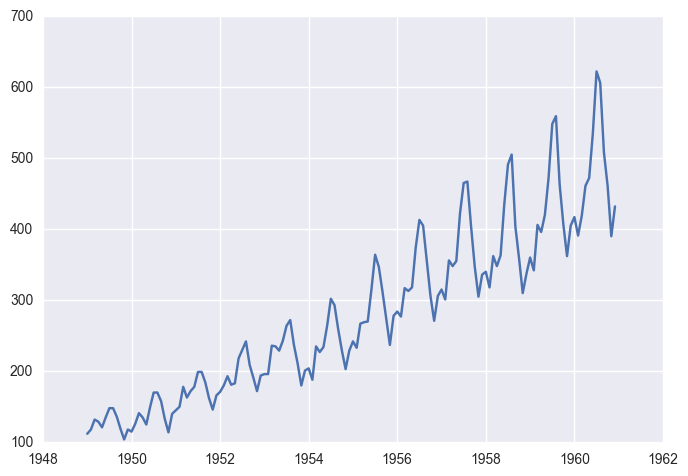

In [6]:
plt.plot(df['time'], df['AirPassengers'])

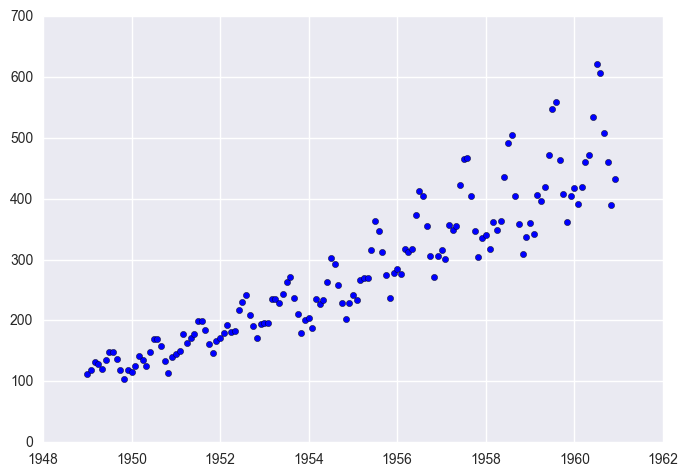

In [7]:
plt.scatter(df['time'], df['AirPassengers'])

In [8]:
pydataset.data('iris', show_doc=True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [9]:
iris = pydataset.data('iris')

In [12]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [13]:
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


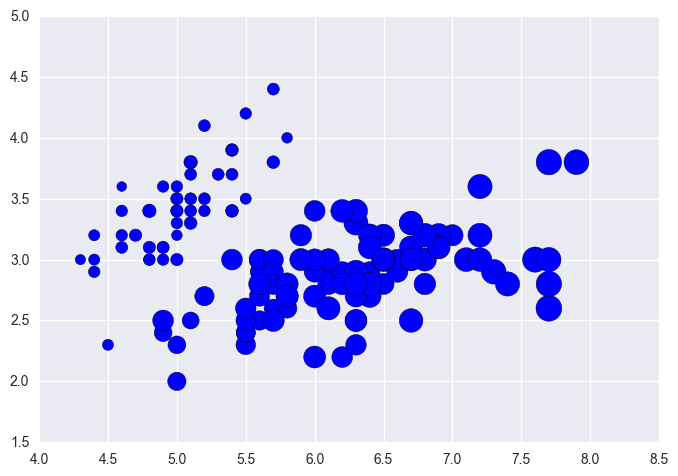

In [15]:
plt.scatter(iris['Sepal.Length'], iris['Sepal.Width'], sizes=50 * iris['Petal.Length'])

In [16]:
def specie_color(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    return 2

In [17]:
iris['SpeciesNumber'] = iris['Species'].apply(specie_color)

In [18]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,SpeciesNumber
1,5.1,3.5,1.4,0.2,setosa,0
2,4.9,3.0,1.4,0.2,setosa,0
3,4.7,3.2,1.3,0.2,setosa,0
4,4.6,3.1,1.5,0.2,setosa,0
5,5.0,3.6,1.4,0.2,setosa,0


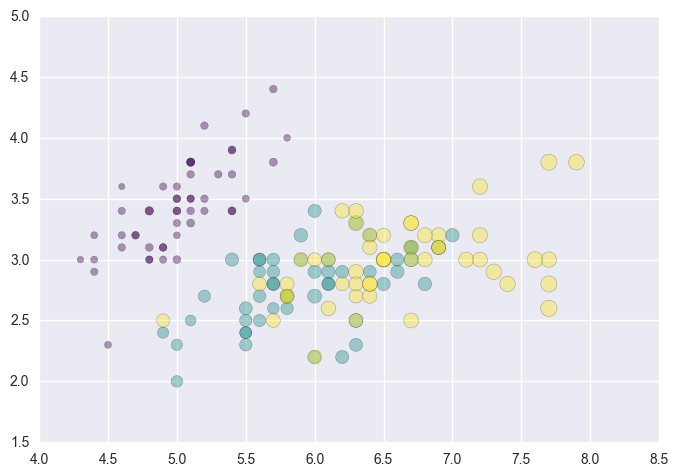

In [19]:
plt.scatter(
    iris['Sepal.Length'], iris['Sepal.Width'], sizes=20 * iris['Petal.Length'],
    c=iris['SpeciesNumber'], cmap='viridis', alpha=0.4
)